# Fun with Charts
Learn how to present data better with charts. Also, matplotlib should allow for some better charts than excel. Also good chance for me to learn and play around with pandas and matplotlib.

In particular a graph I would like is perhaps a sort of representation of sorted elements (say points on a yield curve), but also be able to see historical ranges, max-mins, etc. I know that you could probably hack the OHLC style chart in excel, but I enjoy doing things from first principles.

In [1]:
# Let's import the libraries we will need to use.
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

<AxesSubplot:>

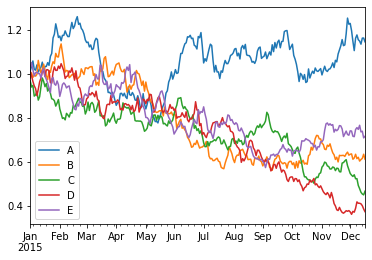

In [2]:
# Generate some data to play with
some_dates = pd.bdate_range(start=datetime(2015, 1, 1), periods=250, freq="B")
some_chg = pd.DataFrame(np.random.normal(1.0, 0.025, (250, 5)), index=some_dates, columns=list("ABCDE"))
some_px = some_chg.cumprod()
some_px.plot()

In [3]:
# View the last n data points
n = 90
print(some_px[-(n+1):-1])

                   A         B         C         D         E
2015-08-12  1.113501  0.642669  0.682671  0.604190  0.725133
2015-08-13  1.133798  0.629665  0.707750  0.616805  0.700692
2015-08-14  1.085876  0.629987  0.720314  0.636590  0.671709
2015-08-17  1.083307  0.610070  0.711316  0.660936  0.664669
2015-08-18  1.082713  0.611015  0.729850  0.693554  0.667203
...              ...       ...       ...       ...       ...
2015-12-09  1.155149  0.620901  0.492822  0.411861  0.747642
2015-12-10  1.148807  0.603333  0.478190  0.411823  0.766236
2015-12-11  1.134780  0.610469  0.461749  0.409198  0.736133
2015-12-14  1.162316  0.615805  0.453789  0.400719  0.739188
2015-12-15  1.162726  0.634612  0.449806  0.385842  0.708955

[90 rows x 5 columns]


In [4]:
# Sort data to have the newest data first
temp_df = some_px.sort_index(ascending=False)
print(temp_df.head())

                   A         B         C         D         E
2015-12-16  1.145378  0.611986  0.466514  0.373549  0.716099
2015-12-15  1.162726  0.634612  0.449806  0.385842  0.708955
2015-12-14  1.162316  0.615805  0.453789  0.400719  0.739188
2015-12-11  1.134780  0.610469  0.461749  0.409198  0.736133
2015-12-10  1.148807  0.603333  0.478190  0.411823  0.766236


In [5]:
# Calc some statistics, after sorting
stats = ["last", "max", "min", "ave", "ave-2sd", "ave+2sd"]
last = temp_df.iloc[0] #Latest data
max_px = np.max(temp_df[:n], axis=0)
min_px = np.min(temp_df[:n], axis=0)
av_px = np.mean(temp_df[:n], axis=0)
sd_px = np.std(temp_df[:n], axis=0)
lr_px = av_px - 2 * sd_px
hr_px = av_px + 2 * sd_px

In [6]:
stats_df = pd.concat([last, max_px, min_px, av_px, lr_px, hr_px], axis=1)
stats_df.columns = stats
print(stats_df)

       last       max       min       ave   ave-2sd   ave+2sd
A  1.145378  1.253276  0.960520  1.087029  0.951498  1.222561
B  0.611986  0.720144  0.561893  0.621982  0.553743  0.690220
C  0.466514  0.825188  0.449806  0.627491  0.430279  0.824703
D  0.373549  0.698233  0.361510  0.505339  0.318138  0.692541
E  0.716099  0.776639  0.573947  0.683800  0.579726  0.787874


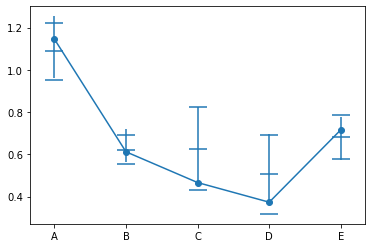

In [7]:
x_labels = list(last.index.values) #Need to convert categroical to numeric range
x_rng = range(len(x_labels))
# Create the figure
fig, ax = plt.subplots()

# Plot the last data points
ax.plot(x_rng, last.values, marker="o")

# Plot the min-max ranges
ax.vlines(x_rng, min_px, max_px)

# Plot the horizontal bars
h_width = 0.25 #Determine the width of the bars
h_elems = [av_px, lr_px, hr_px]
x_low = [x - 0.5*h_width for x in x_rng]
x_high = [x + 0.5*h_width for x in x_rng]
for elem in h_elems:
    ax.hlines(elem, x_low, x_high)

plt.xticks(x_rng, x_labels) #Remap back to numerical
plt.show()

<AxesSubplot:>

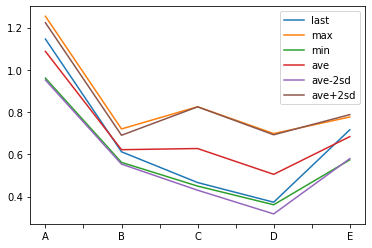

In [8]:
stats_df.plot()

# Conclusion
Having achieved the overall effect, I guess some fine tuning would be ideal to get the colours and line widths a bit nicer, lebel axes, etc. However, will probably package it up into a function of some sort so that I could use it repeatedly.

# Date Tools
Testing some tools to calculate sfe and imm dates

In [9]:
from datetime import date
import jtcharttools
print(jtcharttools.sfe_date(2021,12))

2021-12-09


In [10]:
print(jtcharttools.imm_date(2021,3))

2021-03-17
